# msvmpy

Multiclass SVMs in python

## Offerings

`hard_margin.py` - hard margin multiclass SVM solved using the QP solver `CVXOPT`

## Example

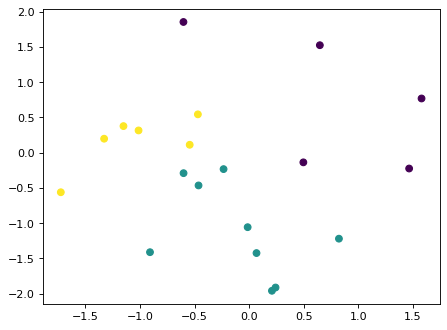

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 80

def make_dataset(num_samples, num_classes, num_features, random_seed = None):
    if random_seed is not None:
        np.random.seed(random_seed)
    X = np.random.randn(num_samples,num_features)
    Wstar = np.random.randn(num_features,num_classes)      # ground truth classifier
    y = np.argmax(X@Wstar,axis=1)     # labels
    return X, y

num_samples = 20
num_classes = 3
num_features = 2
X,y = make_dataset(num_samples,num_classes,num_features,42)
plt.scatter(X[:,0],X[:,1],c = y)

In [9]:
import hard_margin
WDn,_ = hard_margin.FnormA_du_orig(X,y,num_classes)

     pcost       dcost       gap    pres   dres
 0: -1.1536e+01 -2.6738e+01  1e+02  9e+00  2e+00
 1: -2.9245e+01 -3.3554e+01  5e+01  4e+00  1e+00
 2: -1.1632e+02 -1.1295e+02  6e+01  4e+00  9e-01
 3: -2.0798e+02 -1.9863e+02  9e+01  3e+00  8e-01
 4: -1.6837e+02 -1.8771e+02  2e+02  2e+00  5e-01
 5: -1.4671e+02 -1.5158e+02  4e+01  4e-01  9e-02
 6: -1.3272e+02 -1.3287e+02  4e-01  3e-03  7e-04
 7: -1.3266e+02 -1.3266e+02  4e-03  3e-05  7e-06
 8: -1.3265e+02 -1.3265e+02  4e-05  3e-07  7e-08
 9: -1.3265e+02 -1.3265e+02  4e-07  3e-09  7e-10
Optimal solution found.


In [12]:
def plot_line(w,b=0,**kwargs):
    # plot the set of points v = [x,y] in R^2 such that
    # w@v = b
    # w[0]*x + w[1]*y= b
    # y = x*(-w[0]/w[1])+b/w[1]
    ax = plt.gca()
    xlims = ax.get_xlim()
    ylims = ax.get_ylim()
    xs = np.linspace(xlims[0],xlims[1])
    ys = -xs*(w[0]/w[1])+b/w[1]
    ax.plot(xs,ys,**kwargs)
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    return None

def plot_bdry(w):
    plot_line(w[:,0] - w[:,1], linestyle=':', c= 'k')
    plot_line(w[:,0] - w[:,2], linestyle=':', c= 'k')
    plot_line(w[:,1] - w[:,2], linestyle=':', c= 'k')
    return None

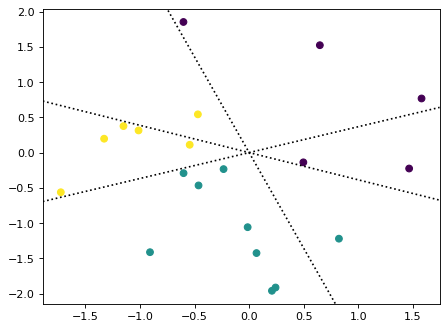

In [13]:
plt.scatter(X[:,0],X[:,1],c = y)
plot_bdry(WDn)